In [1]:
import os
import sys
sys.path.append(os.path.abspath('..'))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from active_learning import get_tracked_lineages_df
from preprocessing.read_data import get_report
import utils, os

%config InlineBackend.figure_format = 'svg'

In [3]:
settings = utils.load_settings(path="../settings_sample.json")
cleaned_data_dir = settings["cleaned_data_dir"]
plots_dir = settings["plots_dir"]
reports_dir = settings["reports_dir"]
raw_data_dir = settings["raw_data_dir"]

In [4]:
df = pd.read_parquet(os.path.join(cleaned_data_dir, "cleaned_dataset.parquet"))
df.drop(columns=["Accession ID", "col_date", "sub_date"], inplace=True)

In [5]:
df

,lineage,country,date,sequence,full_lineage,lineage_hierarchy
0,B.1.1.353,Reunion,2021-02-02,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,B.1.1.353,"[B, B.1, B.1.1, B.1.1.353]"
1,B.1.160.18,Mayotte,2021-01-18,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,B.1.160.18,"[B, B.1, B.1.160, B.1.160.18]"
2,R.1,Ghana,2021-01-10,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,B.1.1.316.1,"[B, B.1, B.1.1, B.1.1.316, B.1.1.316.1]"
3,B.1.1,Nigeria,2020-07-07,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,B.1.1,"[B, B.1, B.1.1]"
4,B.1.351,Equatorial Guinea,2021-01-12,AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC...,B.1.351,"[B, B.1, B.1.351]"
...,...,...,...,...,...,...
40557,B.1.351,South Africa,2020-12-28,TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTC...,B.1.351,"[B, B.1, B.1.351]"
40558,BA.5.11,South Africa,2022-10-17,TTGTAGATCTGTTCTCTAAACGAACTAGGTTCGCGACGTGCTCGTA...,B.1.1.529.5.11,"[B, B.1, B.1.1, B.1.1.529, B.1.1.529.5, B.1.1...."
40559,BA.5.11,South Africa,2022-10-25,TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTC...,B.1.1.529.5.11,"[B, B.1, B.1.1, B.1.1.529, B.1.1.529.5, B.1.1...."
40560,BA.5.11,South Africa,2022-10-26,TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTC...,B.1.1.529.5.11,"[B, B.1, B.1.1, B.1.1.529, B.1.1.529.5, B.1.1...."


In [6]:
df.date.min(), df.date.max()

(Timestamp('2020-01-01 00:00:00'), Timestamp('2024-01-19 00:00:00'))

In [7]:
df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.to_period('Q')
df['length'] = df['sequence'].apply(len)
class_counts = df['full_lineage'].value_counts()

In [8]:
len(class_counts)

467

# Extracting the VOIs

In [9]:
vois_df = get_tracked_lineages_df(df)

In [10]:
vois_df.sort_values(by="designation_date", inplace=True, ascending=True)

In [11]:
vois_df.to_excel(os.path.join(cleaned_data_dir, "tracked_lineages.xlsx"), index=False)

In [15]:
vois_df = vois_df[vois_df['first_dataset_date'] < vois_df['designation_date']]

In [16]:
vois_summary_df = vois_df.groupby('who_label').aggregate({'count': 'sum'}).sort_values('count', ascending=False)

In [17]:
vois_summary_df

,count
who_label,
Delta,16677
Beta,7049
Omicron-BA.2,2818
Alpha,2476
Eta,591
Omicron-BA.5,454
Omicron-CH.1.1,420
Omicron-BA.1,416
Omicron-BA.2.86,12


In [30]:
# df[(df.lineage.str.startswith("BA.2")) & (~df.lineage.str.startswith("BA.2.86")) & (~df.lineage.str.startswith("BA.2.74"))]
df[df.lineage.str.startswith("P.2")]

# CH.1.1 :: B.1.1.529.2.75.3.4.1.1.1.1
# BA.1 :: B.1.1.529.1
# BA.2 :: B.1.1.529.2
# BA.4 :: B.1.1.529.4
# BA.5 :: B.1.1.529.5
# BA.2.74 :: B.1.1.529.2.74
# BA.2.86 :: B.1.1.529.2.86

,lineage,country,date,sequence,full_lineage,lineage_hierarchy
29942,P.2,South Africa,2021-01-20,TCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTTGTCCGG...,B.1.1.28.2,"[B, B.1, B.1.1, B.1.1.28, B.1.1.28.2]"
30088,P.2,Tunisia,2021-03-03,AAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCT...,B.1.1.28.2,"[B, B.1, B.1.1, B.1.1.28, B.1.1.28.2]"
32557,P.2,Tunisia,2021-02-11,GGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTA...,B.1.1.28.2,"[B, B.1, B.1.1, B.1.1.28, B.1.1.28.2]"


# Visualizations

In [ ]:
def plot_hist(seq, bins=100, title="", xlabel="", ylabel="", label="", figsize=(10, 5), density=False):
    fig, ax = plt.subplots(figsize=figsize)
    ax.hist(seq, bins=bins, color='skyblue', edgecolor='black', density=density, label=label)
    ax.set_title(title);
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    return fig, ax

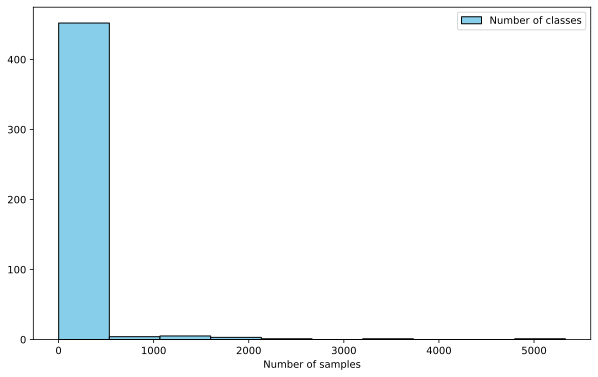

In [116]:
fig, ax = plot_hist(
    class_counts.values, 
    bins=10,
    label="Number of classes",
    density=False,
    xlabel="Number of samples", 
    figsize=(10, 6)
)
ax.legend()
fig.savefig(os.path.join(plots_dir, "n-samples-distribution.pdf"), format='pdf', bbox_inches='tight', dpi=500)


In [117]:
df_by_quarter = df.groupby(['year', 'quarter']).size().reset_index(name='count')

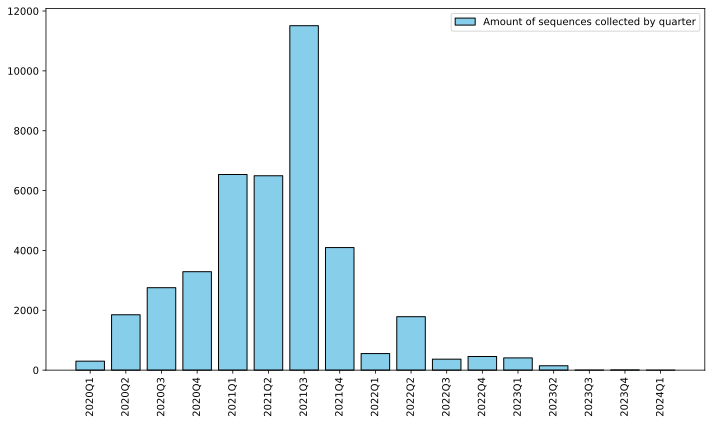

In [118]:
plt.figure(figsize=(10, 6))
quarters = df_by_quarter['quarter'].astype(str)
counts = df_by_quarter['count']

plt.bar(quarters, counts, color='skyblue', edgecolor='black', label='Amount of sequences collected by quarter')
# plt.ylabel('Amount of Data Collected')
# plt.title('Data Collected by Quarter')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "year-quater-distribution.pdf"), format='pdf', bbox_inches='tight', dpi=500)


In [23]:
bases_counts = Counter(''.join(df['sequence'].astype(str).values))

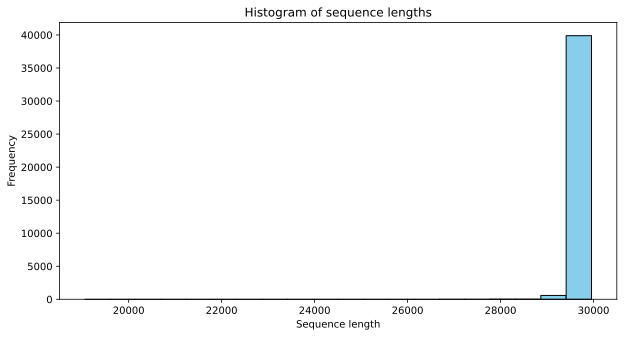

In [49]:
# Plot the histogram of the sequence lengths
plot_hist(
    df['length'], 
    bins=20, 
    title="Histogram of sequence lengths", 
    xlabel="Sequence length", 
    ylabel="Frequency"
);

In [64]:
bases = ['A', 'C', 'G', 'T']
base_counts = {base: 0 for base in bases}
for seq in df['sequence']:
    seq_base_counts = Counter(seq.upper())
    for base in bases:
        base_counts[base] += seq_base_counts[base]

In [65]:
def plot_base_frequency(figsize=(10, 6), freq=True):
    total_bases = sum(base_counts.values())
    base_freqs = {base: count / total_bases for base, count in base_counts.items()}

    # Extract labels and data for plotting
    base_labels = list(base_freqs.keys()) if freq else list(base_counts.keys())
    base_data = list(base_freqs.values()) if freq else list(base_counts.values())

    fig, ax = plt.subplots(figsize=figsize)
    ax.bar(base_labels, base_data, color='skyblue', edgecolor='black')
    ax.set_title("Frequency of Each Base");
    ax.set_xlabel("Base");
    ax.set_ylabel("Frequency");
    return fig, ax

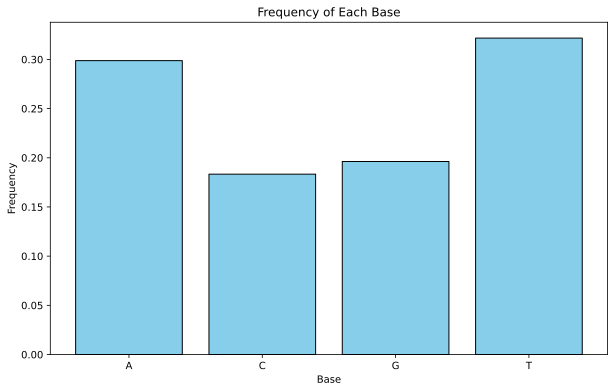

In [67]:
fig, ax = plot_base_frequency()

In [68]:
# Count the occurrences of each label
label_counts = {}
for label in df['full_lineage']:
    if label in label_counts:
        label_counts[label] += 1
    else:
        label_counts[label] = 1

In [69]:
def plot_label_distribution(figsize=(12, 4)):
    # Extract labels and data for plotting
    label_names = list(label_counts.keys())
    label_data = list(label_counts.values())

    fig, ax = plt.subplots(figsize=figsize)
    ax.bar(label_names, label_data, color='skyblue', edgecolor='black')
    ax.set_xticks(range(len(label_names)))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title("Distribution of Labels");
    ax.set_xlabel("Label");
    ax.set_ylabel("Count");
    return fig, ax

(<Figure size 1200x400 with 1 Axes>,
 <Axes: title={'center': 'Distribution of Labels'}, xlabel='Label', ylabel='Count'>)

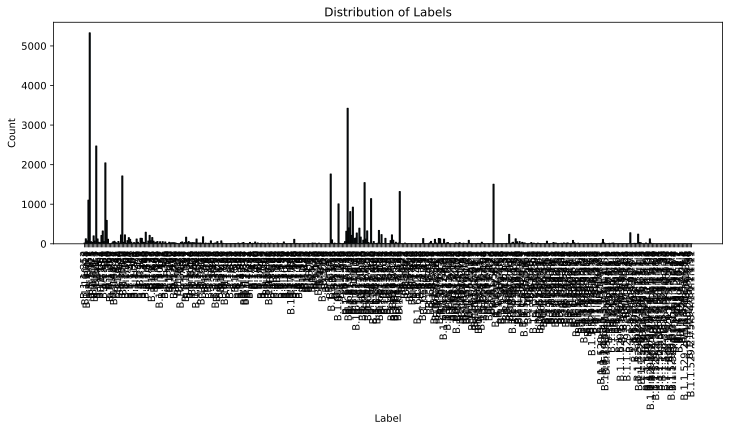

In [70]:
plot_label_distribution()

In [71]:
country_counts = Counter(df['country'])
country_counts = dict(sorted(country_counts.items(), key=lambda x: x[1], reverse=True))

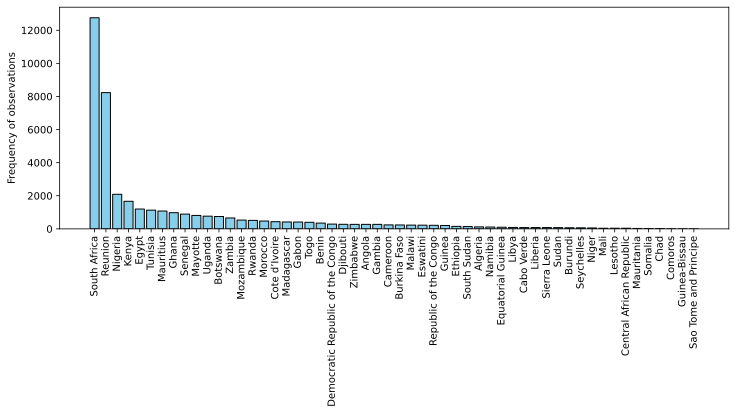

In [72]:
label_names = list(country_counts.keys())
label_data = list(country_counts.values())

fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(label_names, label_data, color='skyblue', edgecolor='black')
ax.set_xticks(range(len(label_names)))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# ax.set_title("Distribution of Labels");
# ax.set_xlabel("Label");
ax.set_ylabel("Frequency of observations");
fig.savefig(os.path.join(plots_dir, "country_distribution.pdf"), format='pdf', bbox_inches='tight', dpi=500)

In [73]:
len(country_counts)

54

# Preprocessing report

In [ ]:
get_report(input_dir=raw_data_dir, output_dir=reports_dir)